In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
spotify = pd.read_csv('spotify_songs.csv')
spotify = spotify.drop_duplicates(subset=['track_id'])
spotify.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.000000,28356.00000,28356.000000
mean,39.329771,0.653372,0.698388,5.368000,-6.817696,0.565489,0.107954,0.177176,0.091117,0.190958,0.510387,120.95618,226575.967026
std,23.702376,0.145785,0.183503,3.613904,3.036243,0.495701,0.102556,0.222803,0.232548,0.155894,0.234340,26.95456,61078.450819
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4000.000000
25%,21.000000,0.561000,0.579000,2.000000,-8.309250,0.000000,0.041000,0.014375,0.000000,0.092600,0.329000,99.97200,187742.000000
50%,42.000000,0.670000,0.722000,6.000000,-6.261000,1.000000,0.062600,0.079700,0.000021,0.127000,0.512000,121.99300,216933.000000
75%,58.000000,0.760000,0.843000,9.000000,-4.709000,1.000000,0.133000,0.260000,0.006570,0.249000,0.695000,133.99900,254975.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.44000,517810.000000


In [56]:
# Create data subset specifically for correlation matrix
spotify_corr_subset = spotify[spotify.columns[9:23]].assign(track_popularity=spotify['track_popularity'])
spotify_corr_subset = spotify_corr_subset.drop('playlist_subgenre', axis=1)

In [35]:
# Perform one-hot encoding of genre for purposes of correlation matrix insights
spotify_corr_subset = pd.get_dummies(spotify_corr_subset, columns=['playlist_genre'], prefix='genre')

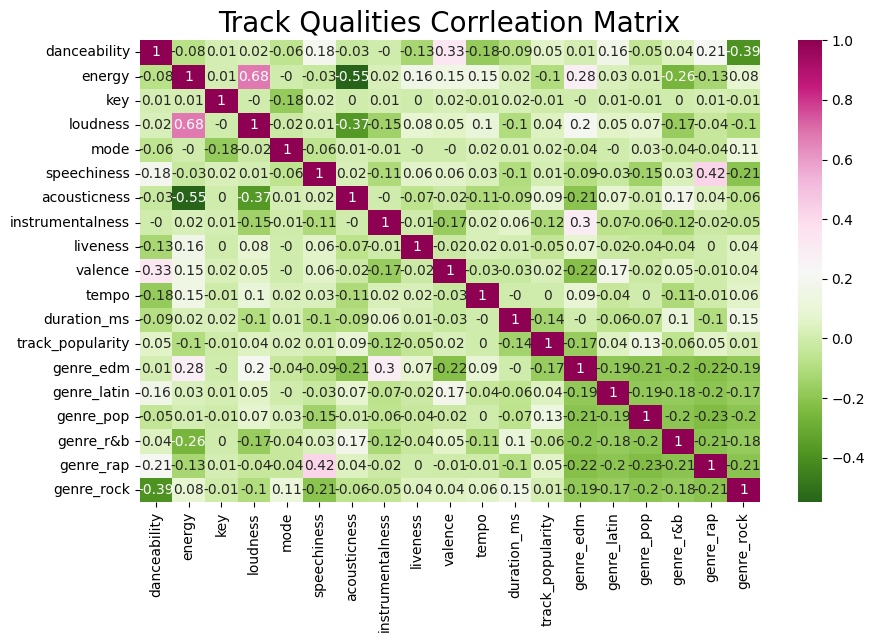

In [37]:
# Generate larger sized plot containing seaborn heatmap (reversed color mapping)
plt.figure(figsize=(10,6))
plt.title('Track Qualities Corrleation Matrix', fontsize=20)
sns.heatmap(spotify_corr_subset.corr().round(2), cmap = 'PiYG_r', annot=True)
# plt.savefig('track_corr.png', bbox_inches='tight')
plt.show()

##### Although distinct correlations are harder to find in this dataset due to the more human factor of music taste in song popularity, our group did notice some important highlights:
- loudness, instrumentalness, duration, and genre_edm have the most (negative) corrleation with song_popularity.
- loudness and energy have a distinct positive correlation, a natural connection. We further explored this connection in our modeling.
- acousticness and energy have a similarly distinct negative correlation, also easily understood.
- genre_rap and speechiness have a somewhat hidden positive correlation, with genre_rock representing the opposite, negative correlation.
- acousticness and loudness have a negative corrleation.

### Data Preparation
#### Original Source:
[Tidy Tuesday's challenge](https://github.com/rfordatascience/tidytuesday/tree/main/data/2020/2020-01-21) for the week of January 21st, 2020. 

This dataset was originally scraped from Spotify's Web API using spotifyr package in r to simplify the learning process for newer coders in data science. By removing the barrier to entry in dataset creation, the weekly social challenge allows more people to participate in new, exciting data.  
While tidytuesday recommends using their datasets not to draw conclusions about causation and simply practice coding, our classroom environment is given more time than the quick visualizations usually featured in the event, meaning we have more time and reason to think about conclusions.
Upon cleaning, after removing duplicates in track_id (as some songs feature in many official spotify playlists), we found very few missing values, only a handful in columns such as album_name and artist_name. 